# Matplotlib

Matplotlib is an extremely power tool for plotting and visualization. You can customize the format of your figures as well! Below you will see a recommended set of format parameters that satisfy all figure requirements for the Computer Projects.  

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

#choose one of the following for your color map for plots! See below for the different colors
cmaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']

params = {'image.aspect':'equal',
          'savefig.dpi':600,
          'axes.grid':True,
          'font.size':12,
          'text.color':'black',
          'text.usetex':True,
          'image.cmap':'viridis'}

mpl.rcParams.update(params)

To show the different color maps, we will use a somewhat complicated plotting routine. To understand what is happening and how each parameter impacts the final result, mess around with the numbers everywhere!

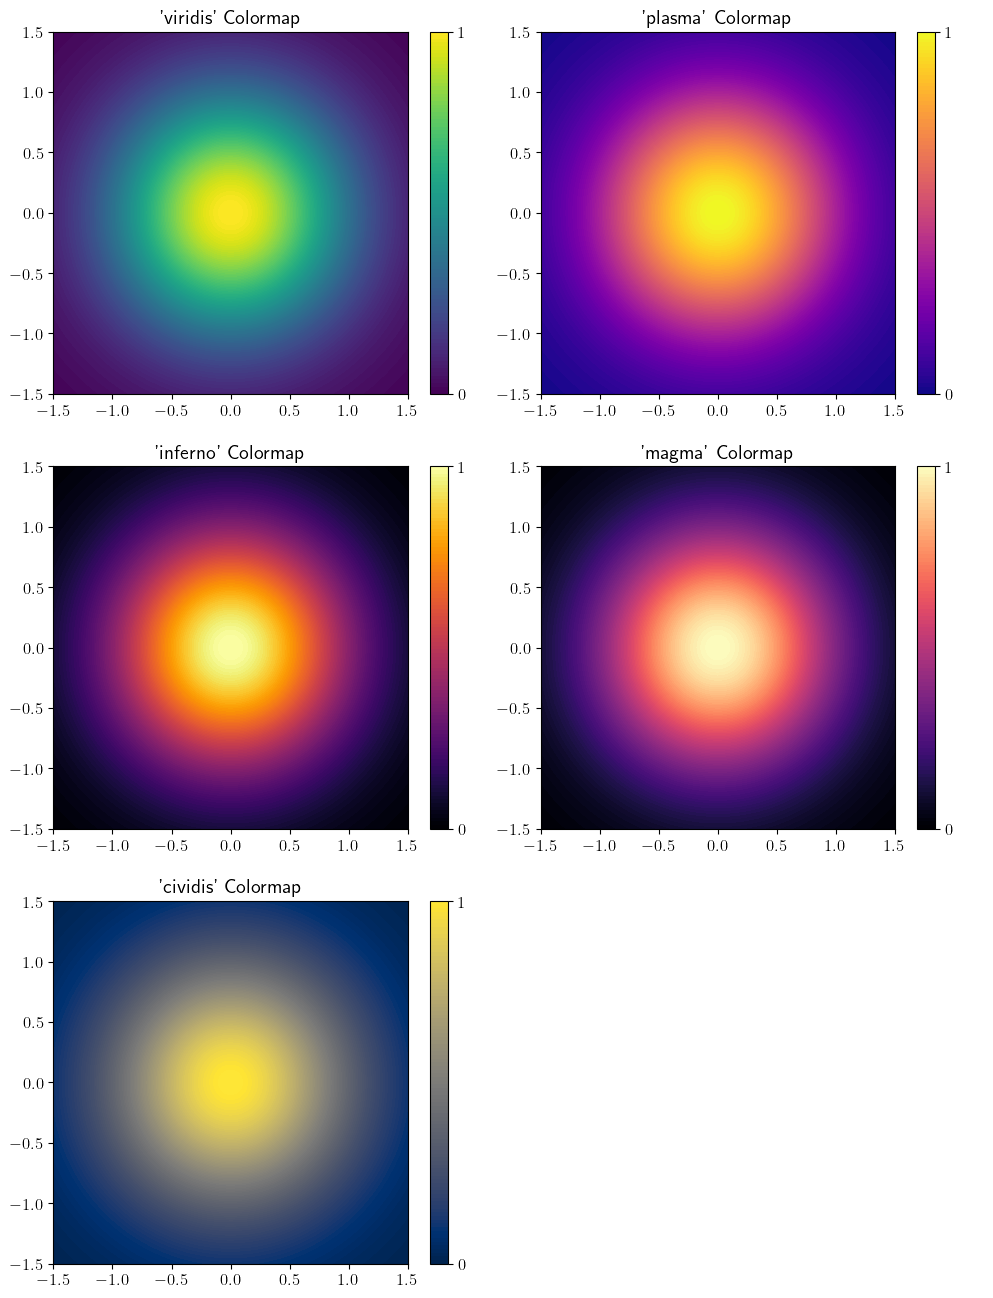

In [2]:
import numpy as np
def func(x, y):
    return np.exp(-x**2) * np.exp(-y**2)
    
x, y = np.linspace(-1.5,1.5,1000), np.linspace(-1.5,1.5,1000)
x,y = np.meshgrid(x,y)

fig, axes = plt.subplot_mosaic([['viridis', 'plasma'],
                                ['inferno', 'magma'],
                                ['cividis','null']],
                                figsize = (12,16),
                                gridspec_kw={'hspace':.2,
                                             'wspace':.1})
for cmap in cmaps:
    img = axes[cmap].contourf(x,y,func(x,y), 
                              levels = np.linspace(0.,1.,100), 
                              cmap = cmap)
    fig.colorbar(img, ticks = [0,1.])
    axes[cmap].set_title(f"'{cmap}' Colormap")
    axes[cmap].grid(False)
axes['null'].set_axis_off()
plt.show()

You can also include $\LaTeX\:$ math in axis labels and the title!

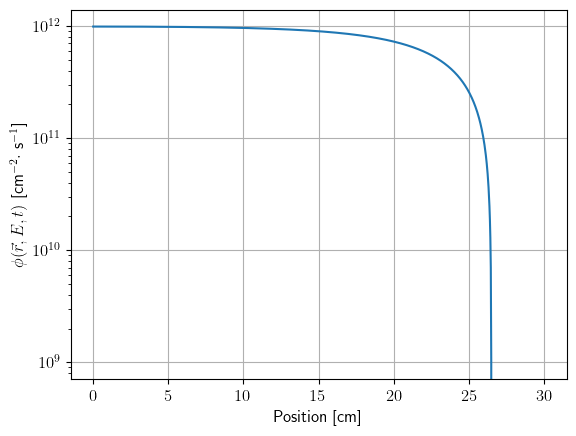

In [3]:
def func(x):
    return -1e10 * np.cosh(x/5) + 1e12

x = np.linspace(0,30,1000)
plt.semilogy(x, func(x))
plt.ylabel(r'$\phi(\vec{r}, E, t)$  [cm$^{-2}\cdot$ s$^{-1}$]')
plt.xlabel('Position  [cm]')
plt.show()

The last cool thing to share about matplotlib is you can create gifs of plots! This is done with animation.FuncAnimation!

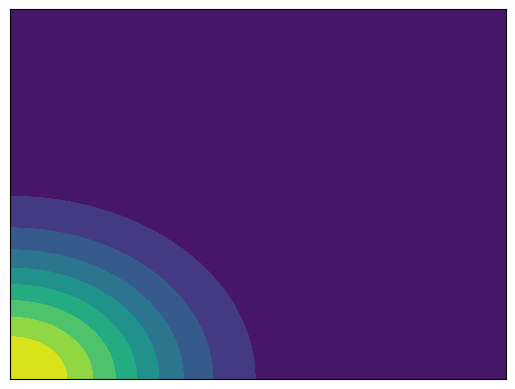

In [5]:
from matplotlib.animation import FuncAnimation, PillowWriter
from functools import partial

def func(x, y, t):
    xop = -(x-t)**2
    yop = -(y-t)**2
    return np.exp(xop) * np.exp(yop)

x, y = np.linspace(-1.5,1.5,100), np.linspace(-1.5,1.5,100)
x, y = np.meshgrid(x, y)

def plot_func(t, ax, x=x, y=y):
    return ax.contourf(x, y, func(x, y, t), levels = np.linspace(0,1,10))

frames = np.linspace(-1.5,1.5,100)

fig, ax = plt.subplots()
ax.grid(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
gif = FuncAnimation(fig, partial(plot_func, ax=ax), 
                          frames = frames)
writergif = PillowWriter() 
gif.save('animation.gif', writer=writergif)